## Master Thesis Code: How do macroeconomic indicators affect CBCM within the EU?

Georgia Kollbach 
31.08.2020

### 1. Download and install relevant packages

##### 1.1 *Install relevant packages required for the statistical analysis*

In [73]:
install.packages(c("ggplot2", "pscl", "MASS", "boot", "moments", "reshape2", "Hmisc","readxl", "caret", "dplyr", "GGally", "corrgram","psych"))


also installing the dependency ‘mnormt’





  There is a binary version available but the source version is later:
         binary source needs_compilation
reshape2  1.4.3  1.4.4              TRUE


The downloaded binary packages are in
	/var/folders/zw/pxlk_wj500x7ks8cs9dtvst40000gp/T//RtmpZyMxpn/downloaded_packages


installing the source package ‘reshape2’




##### 1.2 *Load the relevant libraries*

In [4]:
library(dplyr)
library(GGally)
library(Hmisc)
library(corrgram)
library(reshape2)
library(ggplot2)
library(pscl)
library(MASS)
library(boot)
library(caret)
library(psych)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


Attaching package: ‘corrgram’


The following object is masked from ‘package:lattice’:

    panel.fill


Classes and Methods for R developed in the
Political Science Computational Laboratory
Depart

##### 1.3 Import Data File

In [5]:
dat <- read.csv("/Users/Georgia1/Desktop/Rdata1_Averages.csv")
summary(dat)


       ID              Year                Country        CBMAC       
 Min.   :  1.00   Min.   :2010   Austria       : 10   Min.   :  0.00  
 1st Qu.: 70.75   1st Qu.:2012   Belgium       : 10   1st Qu.:  1.00  
 Median :140.50   Median :2014   Bulgaria      : 10   Median :  5.50  
 Mean   :140.69   Mean   :2014   Croatia       : 10   Mean   : 13.66  
 3rd Qu.:210.25   3rd Qu.:2017   Czech Republic: 10   3rd Qu.: 15.25  
 Max.   :280.00   Max.   :2019   Denmark       : 10   Max.   :114.00  
                                 (Other)       :200                   
     CBMMC            CBCAC            CBCMC            CBSTAC     
 Min.   :  0.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.00  
 1st Qu.:  1.00   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 0.00  
 Median :  8.00   Median : 0.000   Median : 0.000   Median : 0.00  
 Mean   : 13.96   Mean   : 1.915   Mean   : 2.077   Mean   : 0.45  
 3rd Qu.: 17.25   3rd Qu.: 1.000   3rd Qu.: 0.000   3rd Qu.: 0.00  
 Max.   :120.00   Max.  

##### 1.4 Processing the Data 1: Standardizing the variables

In [6]:
preproc1 <- preProcess(dat[,c(9:13)], method = c('center', 'scale'))
norm1 <- predict(preproc1, dat[,c(9:13)])
summary(norm1)


           GDP        Inflation          Interest            Exc         
 1,020,348.00:  1   Min.   :-2.2600   Min.   :-1.1875   Min.   :-0.2404  
 1,031,099.00:  1   1st Qu.:-0.7168   1st Qu.:-0.7542   1st Qu.:-0.2357  
 1,032,158.00:  1   Median :-0.0554   Median :-0.1983   Median :-0.2357  
 1,063,763.00:  1   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 1,072,709.00:  1   3rd Qu.: 0.6244   3rd Qu.: 0.4294   3rd Qu.:-0.1807  
 1,077,590.00:  1   Max.   : 3.3986   Max.   : 7.4022   Max.   : 5.3575  
 (Other)     :254                                                        
      Unem        
 Min.   :-1.4618  
 1st Qu.:-0.6887  
 Median :-0.2349  
 Mean   : 0.0000  
 3rd Qu.: 0.2609  
 Max.   : 3.8493  
                  

Given that the variables inflation, interest rate and unemployment are in percentage terms and GDP and exchange rates are in currency levels, the variables must be fitted to be unified. In this step, all variables are standardized according to a Gaussian distribution with a mean and standard deviation. However, since our distribution is not Gaussian, the standardization process is not the best approach to take. 

##### 1.4 Processing the Data 2: Normalizing the variables 

In [7]:
preproc2 <- preProcess(dat[,c(9:13)], method = c("range"))
norm2 <- predict(preproc2, dat[,c(9:13)])
summary(norm2)


           GDP        Inflation         Interest            Exc           
 1,020,348.00:  1   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000000  
 1,031,099.00:  1   1st Qu.:0.2727   1st Qu.:0.05044   1st Qu.:0.0008447  
 1,032,158.00:  1   Median :0.3896   Median :0.11516   Median :0.0008447  
 1,063,763.00:  1   Mean   :0.3994   Mean   :0.13825   Mean   :0.0429520  
 1,072,709.00:  1   3rd Qu.:0.5097   3rd Qu.:0.18824   3rd Qu.:0.0106665  
 1,077,590.00:  1   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000000  
 (Other)     :254                                                         
      Unem       
 Min.   :0.0000  
 1st Qu.:0.1456  
 Median :0.2310  
 Mean   :0.2752  
 3rd Qu.:0.3244  
 Max.   :1.0000  
                 

In this step, a normalization of the variables takes place, with the minimum value 0 and maximum value of 1. This is more accurate when having a distribution that is not Gaussian.

### 2. Descriptive Statistics

In [8]:
describe(dat)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,260,140.692308,81.004680,140.50,140.6923077,103.782000,1.00000,280.0,279.0000,-5.475783e-05,-1.2126767,5.0236970
Year,2,260,2014.500000,2.877821,2014.50,2014.5000000,3.706500,2010.00000,2019.0,9.0000,0.000000e+00,-1.2378758,0.1784749
Country*,3,260,14.315385,7.780815,14.50,14.3942308,9.636900,1.00000,27.0,26.0000,-7.585186e-02,-1.1721233,0.4825456
CBMAC,4,260,13.661538,20.878784,5.50,8.6875000,8.154300,0.00000,114.0,114.0000,2.276925e+00,5.1643050,1.2948472
CBMMC,5,260,13.957692,19.637303,8.00,9.6298077,11.860800,0.00000,120.0,120.0000,2.495672e+00,7.2812241,1.2178539
CBCAC,6,260,1.915385,5.799127,0.00,0.4711538,0.000000,0.00000,44.0,44.0000,4.484285e+00,21.7020151,0.3596466
CBCMC,7,260,2.076923,8.905870,0.00,0.2307692,0.000000,0.00000,92.0,92.0000,7.211937e+00,60.8280395,0.5523186
CBSTAC,8,260,0.450000,3.974023,0.00,0.0000000,0.000000,0.00000,52.0,52.0000,1.079742e+01,124.3794236,0.2464584
GDP*,9,260,130.500000,75.199734,130.50,130.5000000,96.369000,1.00000,260.0,259.0000,0.000000e+00,-1.2138548,4.6636895


### 3. Graphs

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


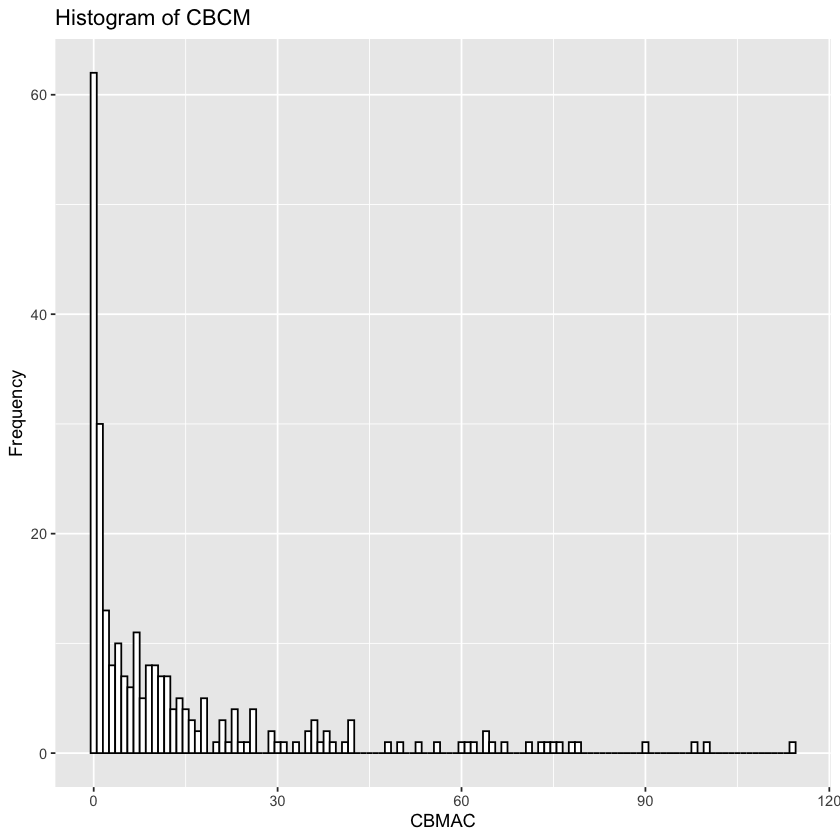

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


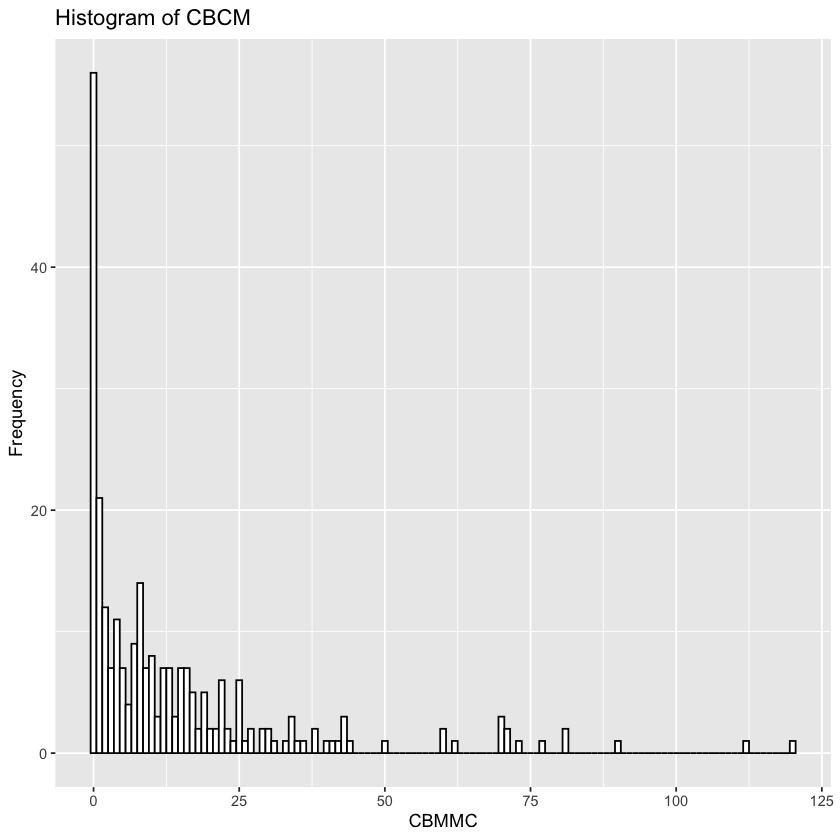

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


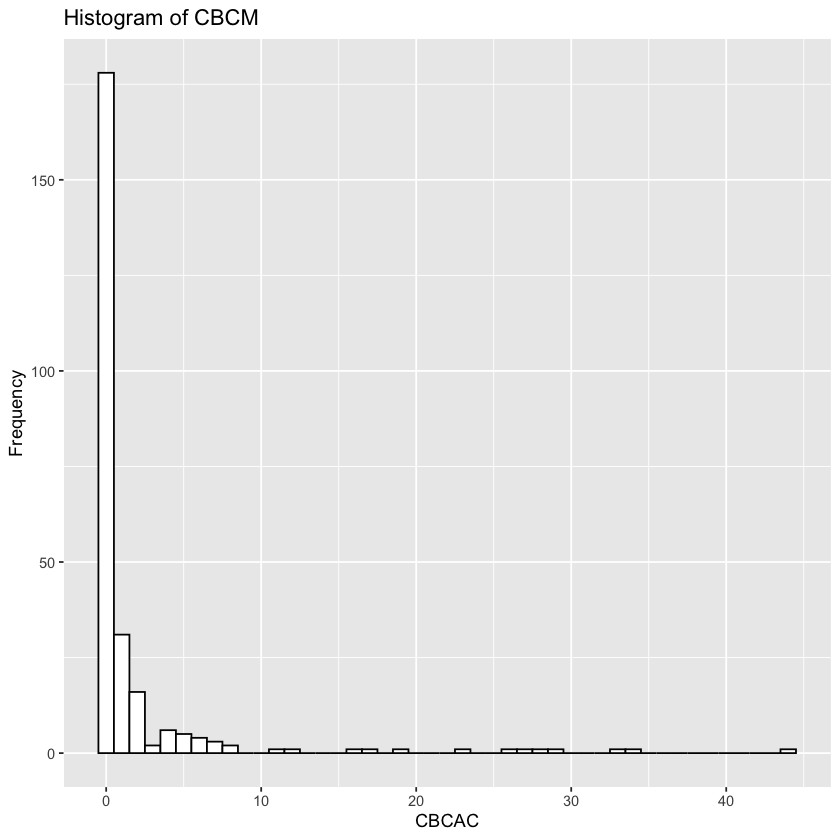

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


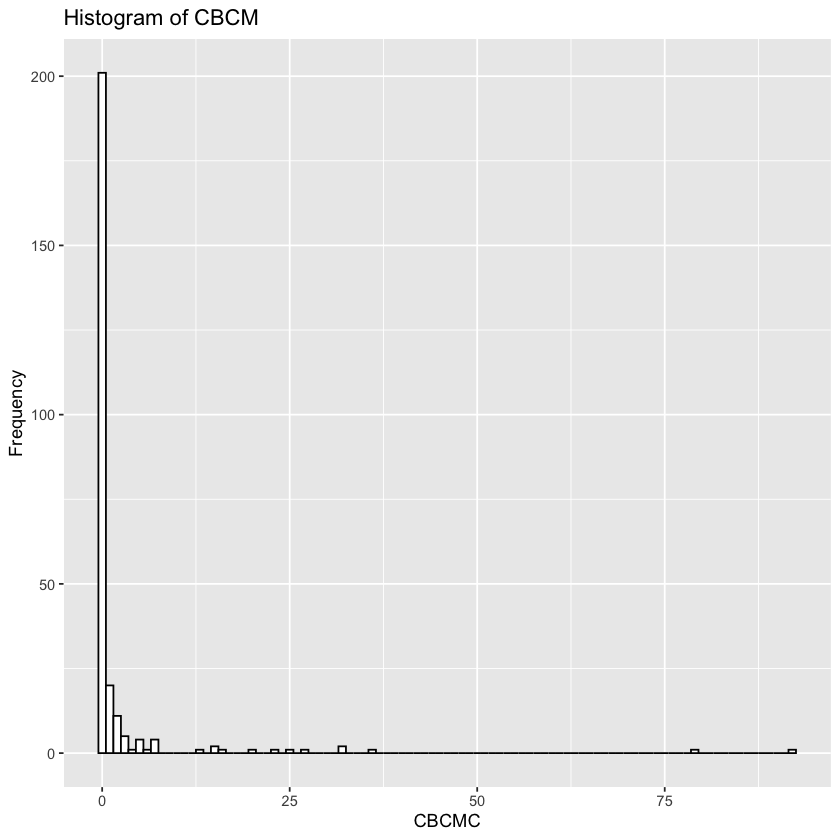

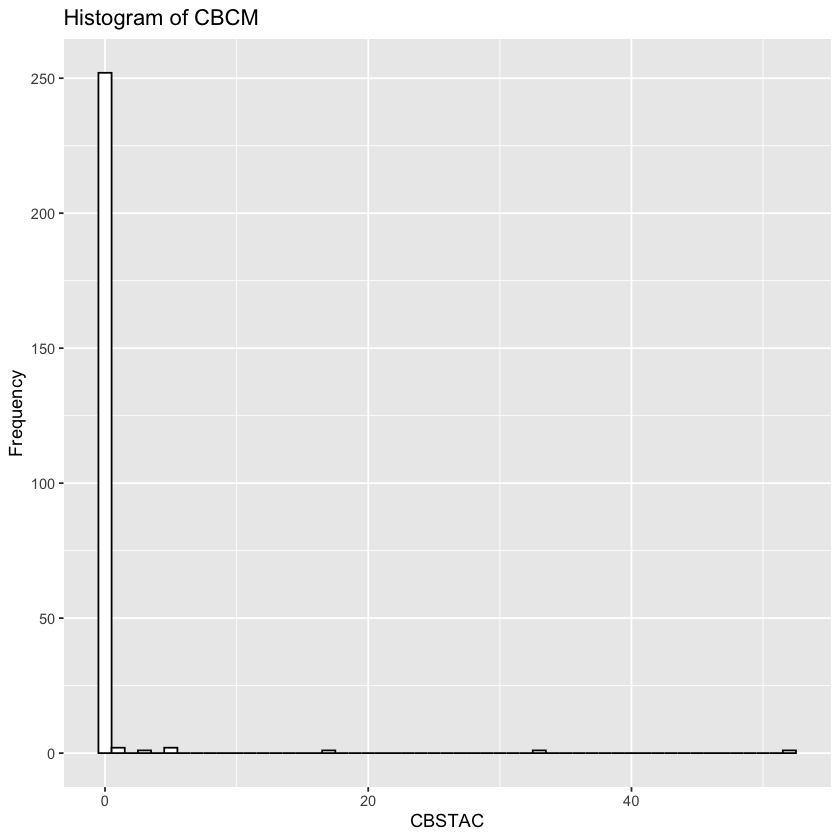

In [78]:
ggplot(zinb_frame, aes(x=CBMAC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBMAC", y= "Frequency", title = "Histogram of CBCM")
ggplot(zinb_frame, aes(x=CBMMC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBMMC", y= "Frequency", title = "Histogram of CBCM")
ggplot(zinb_frame, aes(x=CBCAC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBCAC", y= "Frequency", title = "Histogram of CBCM")
ggplot(zinb_frame, aes(x=CBCMC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBCMC", y= "Frequency", title = "Histogram of CBCM")
ggplot(zinb_frame, aes(x=CBSTAC)) + geom_histogram(binwidth = 1, color = "black", fill = "white") + labs(x = "CBSTAC", y= "Frequency", title = "Histogram of CBCM")


### 4. Statistical Model

Now that the model has been cleaned, processed and normalized, the new data is filled into an excel sheet which will serve as the basis for the statistical analyses in this section.

In [9]:
zinb_frame <- read.csv("/Users/Georgia1/Documents/GitHub/cbcm-analysis/Rdata1_Averages_v.4.csv")
summary(zinb_frame)

       ID              Year                Country        CBMAC       
 Min.   :  1.00   Min.   :2010   Austria       : 10   Min.   :  0.00  
 1st Qu.: 65.75   1st Qu.:2012   Belgium       : 10   1st Qu.:  1.00  
 Median :130.50   Median :2014   Bulgaria      : 10   Median :  5.50  
 Mean   :130.50   Mean   :2014   Croatia       : 10   Mean   : 13.66  
 3rd Qu.:195.25   3rd Qu.:2017   Czech Republic: 10   3rd Qu.: 15.25  
 Max.   :260.00   Max.   :2019   Denmark       : 10   Max.   :114.00  
 NA's   :1        NA's   :1      (Other)       :201   NA's   :1       
     CBMMC            CBCAC            CBCMC            CBSTAC     
 Min.   :  0.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.00  
 1st Qu.:  1.00   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 0.00  
 Median :  8.00   Median : 0.000   Median : 0.000   Median : 0.00  
 Mean   : 13.96   Mean   : 1.915   Mean   : 2.077   Mean   : 0.45  
 3rd Qu.: 17.25   3rd Qu.: 1.000   3rd Qu.: 0.000   3rd Qu.: 0.00  
 Max.   :120.00   Max.  

This csv file has now all data in it. N/A Values were filled by a country-specific average value, since deleting these values yielded a sample size that was too small. All macroeconomic factors denoted with a 1 (e.g. GDP1) are standardized, all variables denoted with a 2 (e.g. GDP2) are normalized.

#### 2.1 Poisson Model

The poisson model cannot be used since the mean and variance of the dependent variables are not the same. Thus, there will be no such analysis here.

#### 2.2 Negative Binomial Model

In [67]:
m1 <- glm.nb(CBMAC ~ GDP2 + Inflation2 + Interest2 + Exc2 + Unem2, data = zinb_frame)
summary(m1)


Call:
glm.nb(formula = CBMAC ~ GDP2 + Inflation2 + Interest2 + Exc2 + 
    Unem2, data = zinb_frame, init.theta = 0.4037472335, link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.77167  -1.14430  -0.50639   0.07688   2.17846  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.83785    0.33243   8.537   <2e-16 ***
GDP2        -0.03883    0.43939  -0.088    0.930    
Inflation2  -0.40230    0.63698  -0.632    0.528    
Interest2    1.11434    1.14311   0.975    0.330    
Exc2         0.11753    0.57514   0.204    0.838    
Unem2       -0.80628    0.69010  -1.168    0.243    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.4037) family taken to be 1)

    Null deviance: 297.71  on 259  degrees of freedom
Residual deviance: 296.40  on 254  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 1794.3

Number of Fisher Scoring iterations: 1



This is how the negative binomial model would look like. However, since there are so many zero values in this dataset, a zero-inflated model will be estimated in the next step, and this model can be disregarded. 

#### 2.3 Zero-inflated negative binomial model (ZINB)

##### 2.3.1 ZINB with DV CBMAC

In [15]:
m2 <- zeroinfl(CBMAC ~ GDP1 + Inflation1 + Interest1 + Exc1 + Unem1, dist='negbin', data = zinb_frame)
summary(m2)



Call:
zeroinfl(formula = CBMAC ~ GDP1 + Inflation1 + Interest1 + Exc1 + Unem1, 
    data = zinb_frame, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.6622 -0.6176 -0.3308  0.1642  4.0800 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.57689    0.09590  26.872  < 2e-16 ***
GDP1        -0.10880    0.10045  -1.083  0.27875    
Inflation1   0.27213    0.11520   2.362  0.01816 *  
Interest1   -0.37148    0.13176  -2.819  0.00481 ** 
Exc1         0.04272    0.09330   0.458  0.64706    
Unem1        0.07439    0.15058   0.494  0.62131    
Log(theta)  -0.80307    0.09253  -8.679  < 2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -179.72     221.64  -0.811    0.417
GDP1          -33.77      42.43  -0.796    0.426
Inflation1     60.63      74.34   0.816    0.415
Interest1     -67.13      84.19  -0.797    0

##### 2.3.2 ZINB with DV CBMMC

In [11]:
m3 <- zeroinfl(CBMMC ~ GDP2 + Inflation2 + Interest2 + Exc2 + Unem2, dist='negbin', data = zinb_frame)
summary(m3)


Call:
zeroinfl(formula = CBMMC ~ GDP2 + Inflation2 + Interest2 + Exc2 + Unem2, 
    data = zinb_frame, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.8268 -0.6686 -0.3314  0.2061  5.0939 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.11729    0.29003  10.748   <2e-16 ***
GDP2         0.03736    0.36534   0.102   0.9186    
Inflation2  -0.59786    0.53419  -1.119   0.2631    
Interest2    0.60158    1.16778   0.515   0.6065    
Exc2         0.04231    0.47143   0.090   0.9285    
Unem2       -0.74892    0.66851  -1.120   0.2626    
Log(theta)  -0.34072    0.15778  -2.160   0.0308 *  

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -1.1260     1.2862  -0.875    0.381
GDP2         -0.5550     1.0375  -0.535    0.593
Inflation2    0.4520     1.9790   0.228    0.819
Interest2    -3.5591     4.0782  -0.873    0

##### 2.3.3 ZINB with DV CBCAC

In [12]:
m4 <- zeroinfl(CBCAC ~ GDP1 + Inflation1 + Interest1 + Exc1 + Unem1, dist='negbin', data = zinb_frame)
summary(m4)

Warning message in sqrt(diag(object$vcov)):
“NaNs produced”



Call:
zeroinfl(formula = CBCAC ~ GDP1 + Inflation1 + Interest1 + Exc1 + Unem1, 
    data = zinb_frame, dist = "negbin")

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-0.46590 -0.44128 -0.35914 -0.04561  6.05103 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.1994     0.2421  -0.824  0.41000    
GDP1         -2.0770     0.4175  -4.975 6.53e-07 ***
Inflation1    0.6259     0.1969   3.179  0.00148 ** 
Interest1    -0.6441     0.2665  -2.417  0.01563 *  
Exc1         -0.1498     0.1402  -1.069  0.28509    
Unem1         0.6509     0.2810   2.316  0.02055 *  
Log(theta)   -1.5100     0.1539  -9.810  < 2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -512.26         NA      NA       NA
GDP1         -327.67         NA      NA       NA
Inflation1     57.12         NA      NA       NA
Interest1    -226.08         NA   

##### 2.3.4 ZINB with DV CBCMC

In [13]:
m5 <- zeroinfl(CBCMC ~ GDP2 + Inflation2 + Interest2 + Exc2 + Unem2, dist='negbin', data = zinb_frame)
summary(m5)

Warning message in value[[3L]](cond):
“system is computationally singular: reciprocal condition number = 5.14601e-17FALSE”



Call:
zeroinfl(formula = CBCMC ~ GDP2 + Inflation2 + Interest2 + Exc2 + Unem2, 
    data = zinb_frame, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.2750 -0.2725 -0.2712 -0.2674 10.2589 

Count model coefficients (negbin with log link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   1.2032         NA      NA       NA
GDP2         -0.7456         NA      NA       NA
Inflation2   -0.8831         NA      NA       NA
Interest2    -1.6025         NA      NA       NA
Exc2          0.9578         NA      NA       NA
Unem2         0.4921         NA      NA       NA
Log(theta)   -2.5684         NA      NA       NA

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -24.140         NA      NA       NA
GDP2          -4.381         NA      NA       NA
Inflation2    -8.508         NA      NA       NA
Interest2     -5.351         NA      NA       NA
Exc2          -2.414       

##### 2.3.5 ZINB with DV CBSTAC

In [65]:
m6 <- zeroinfl(CBSTAC ~ GDP2 + Inflation2 + Interest2 + Exc2 + Unem2, dist='negbin', data = zinb_frame)
summary(m6)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted rates numerically 0 occurred”



Call:
zeroinfl(formula = CBSTAC ~ GDP2 + Inflation2 + Interest2 + Exc2 + Unem2, 
    data = zinb_frame, dist = "negbin")

Pearson residuals:
       Min         1Q     Median         3Q        Max 
-2.466e-01 -5.503e-02 -3.569e-09 -3.568e-09  4.675e+00 

Count model coefficients (negbin with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -14.3707     7.2730  -1.976   0.0482 *  
GDP2           1.1311     8.8838   0.127   0.8987    
Inflation2    21.4183     9.6931   2.210   0.0271 *  
Interest2     64.4930    26.2000   2.462   0.0138 *  
Exc2        -447.2053   398.0646  -1.123   0.2612    
Unem2         15.6263    19.9786   0.782   0.4341    
Log(theta)    -2.7995     0.4519  -6.196 5.81e-10 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -518.0      573.6  -0.903    0.366
GDP2           223.9      247.5   0.905    0.366
Inflation2     598.9      673.9   0.889    0.374
Inter

In [1]:
jupyter nbconvert "20200309_MasterThesisCode_R_v.1_GK.ipynb" --to "pdf"

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected symbol
1: jupyter nbconvert
            ^
